## 1. Scala's real-world project repository data
Scala adalah sebuah bahasa pemrograman yang diciptakan oleh Martin Odersky. Di Scala kita bisa menulis kode lebih ringkas dibandingkan di Java. Akhir-akhir ini scala menjadi bahasa utama para data sciencetist. Scala juga open source project sehingga mudah didapatkan dan dikembangkan oleh umum. Kali ini kita akan menganalisa data dari sebuah github yang mana data tersebut berisikan siapa yang sering melakukan pengembangan terhadap scala.

Disini saya akan menggunakan 3 dataset:
<ol>
    <li><code>pulls_2011-2013.csv</code> berisi informasi dasar tentang pull request, dan terjadi dari akhir 2011 hingga 2014(tetapi tidak termasuk).</li>
    <li><code>pulls_2014-2018.csv</code> berisi informasi yang identik, dan membentang dari 2014 hingga 2018.</li>
<li><code>pull_files.csv</code> berisi file yang telah dimodifikasi oleh setiap pull request.</li>
</ol>

In [1]:
# Importing pandas
import pandas as pd

# Loading in the data
pulls_one = pd.read_csv('datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('datasets/pull_files.csv')

display(pulls_one.head(5))
display(pulls_one.info())
display(pulls_two.head(5))
display(pulls_two.info())
display(pull_files.head(5))
display(pull_files.info())

,pid,user,date
0,11166973,VladimirNik,2013-12-31T23:10:55Z
1,11161892,Ichoran,2013-12-31T16:55:47Z
2,11153894,Ichoran,2013-12-31T02:41:13Z
3,11151917,rklaehn,2013-12-30T23:45:47Z
4,11131244,qerub,2013-12-29T17:21:01Z


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3296 entries, 0 to 3295
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     3296 non-null   int64 
 1   user    3296 non-null   object
 2   date    3296 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.4+ KB


None

,pid,user,date
0,163314316,hrhino,2018-01-16T23:29:16Z
1,163061502,joroKr21,2018-01-15T23:44:52Z
2,163057333,mkeskells,2018-01-15T23:05:06Z
3,162985594,lrytz,2018-01-15T15:52:39Z
4,162838837,zuvizudar,2018-01-14T19:16:16Z


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     2904 non-null   int64 
 1   user    2904 non-null   object
 2   date    2904 non-null   object
dtypes: int64(1), object(2)
memory usage: 68.2+ KB


None

,pid,file
0,163314316,test/files/pos/t5638/Among.java
1,163314316,test/files/pos/t5638/Usage.scala
2,163314316,test/files/pos/t9291.scala
3,163314316,test/files/run/t8348.check
4,163314316,test/files/run/t8348/TableColumn.java


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85588 entries, 0 to 85587
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pid     85588 non-null  int64 
 1   file    85588 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


None

# 2. Cleaning Data
Pertama, kita perlu menggabungkan data dari dua DataFrames pulls_one dan pulls two.
Selanjutnya, data mentah yang diekstrak dari GitHub berisi tanggal dalam format ISO8601. Namun, pandas mengimpornya sebagai string biasa. Untuk membuat analisis kita lebih mudah, kita perlu mengubah string menjadi objek DateTime Python. Objek DateTime memiliki properti penting sehingga dengan mudah dapat dibandingkan dan diurutkan.
Waktu dalam melakukan pull request berada dalam zona waktu UTC (juga dikenal sebagai Coordinated Universal Time Untuk memudahkan perbandingan, kita harus mengonversi wkatu yang digunakan ke zona waktu UTC.

In [2]:
# menggabungkan pulls_one dan pulls_two
pulls = pulls_one.append(pulls_two)
# merubah string pada kolom date menjadi datetime dengan zona waktu UTC
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

pulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 2903
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     6200 non-null   int64              
 1   user    6200 non-null   object             
 2   date    6200 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), int64(1), object(1)
memory usage: 193.8+ KB


## 3. Penggabungan DataFrames
<p>Mari kita gabungkan semua data yang telah kita ekstrak tersebut yaitu menggabungkan data pulls dengan pull_files</p>

In [3]:
data = pd.merge(pulls, pull_files)
display(data.head(5))
data.info()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....
5,11153894,Ichoran,2013-12-31 02:41:13+00:00,src/library/scala/collection/immutable/Numeric...
6,11153894,Ichoran,2013-12-31 02:41:13+00:00,test/junit/scala/collection/NumericRangeTest.s...
7,11151917,rklaehn,2013-12-30 23:45:47+00:00,src/library/scala/collection/immutable/HashMap...
8,11151917,rklaehn,2013-12-30 23:45:47+00:00,src/library/scala/collection/immutable/HashSet...
9,11151917,rklaehn,2013-12-30 23:45:47+00:00,test/files/run/t6196.scala


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85588 entries, 0 to 85587
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   pid     85588 non-null  int64              
 1   user    85588 non-null  object             
 2   date    85588 non-null  datetime64[ns, UTC]
 3   file    85588 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 3.3+ MB


# 4. Apakah project yang dilakukan masih aktif dilakukan pengecekan?
Aktivitas dalam proyek open source tidak terlalu konsisten. Beberapa proyek mungkin aktif selama bertahun-tahun setelah rilis awal, setelah itu malah tidak melakukan rilis proyek lagi. Sebaiknya sebelum berkomitmen untuk berkontribusi pada suatu proyek, penting sekali untuk memahami keadaan proyek tersebut. Apakah pengembangan terus berjalan naik, atau ada penurunan? apakah proyek ini masih berjalan atau sudah ditinggalkan?
Data yang digunakan dalam proyek ini dikumpulkan pada Januari 2018. Kami tertarik untuk melihat siapa yang melakukan pengembangan proyek dengan melihat jumlah kontribusi hingga tanggal itu.

Kali ini kita akan melihat jumlah pull request pada github yang dilakukan setiap bulannya selama proyek tersebut berjalan. Setelah itu kita akan melihat tren berdasarkan kontribusi yang terjadi pada proyek tersebut.

month  year
1      2012     489
       2013    3717
       2014    1140
       2015     732
       2016     640
Name: user, dtype: int64

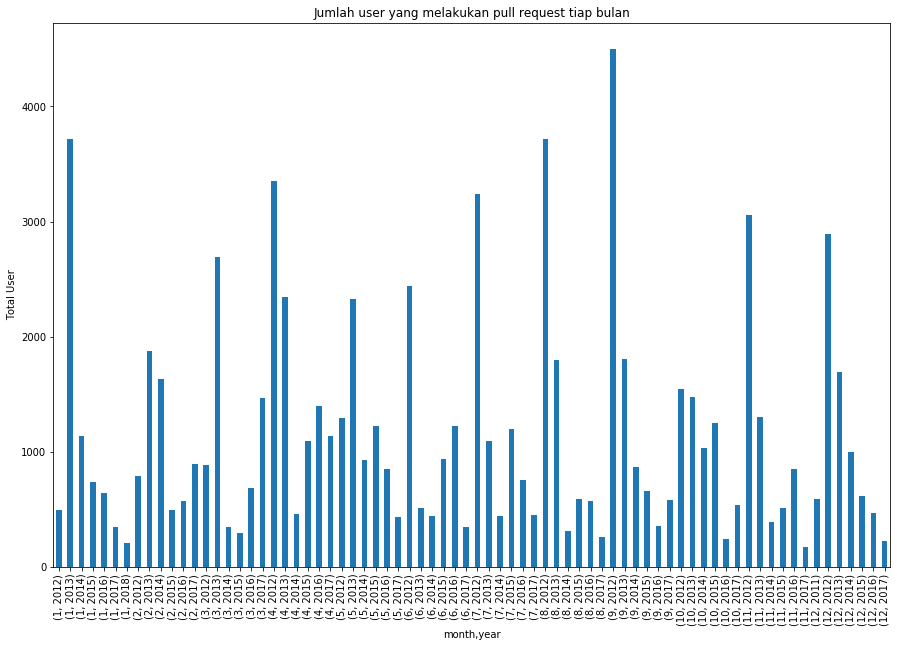

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

# membuat sebuah column bulan dan tahun
data['month'] = data.date.dt.month
data['year'] = data.date.dt.year

# melakukan grupby pada bulan dan tahun untuk melihat jumlah pull request yang terjadi
counts = data.groupby(['month', 'year'])['user'].count()
display(counts.head())
# Plot hasilnya
counts.plot(kind='bar', figsize = (15,10))
plt.title('Jumlah user yang melakukan pull request tiap bulan')
plt.ylabel('Total User')
plt.show()

# 5. Mencari jumlah kontribusi masing-masing user

In [5]:
# Group by the submitter
by_user = data.groupby(['user'], as_index=False)['file'].count().sort_values(by=['file'],ascending=False, ignore_index=True)
display(by_user)

,user,file
0,xeno-by,12649
1,retronym,11430
2,paulp,11260
3,adriaanm,7722
4,lrytz,6988
...,...,...
459,iliffwes,1
460,jaceklaskowski,1
461,jacobsallan,1
462,jbdeboer,1


# 6. Siapakah 5 user yang sering pull request pada masing-masing tahun

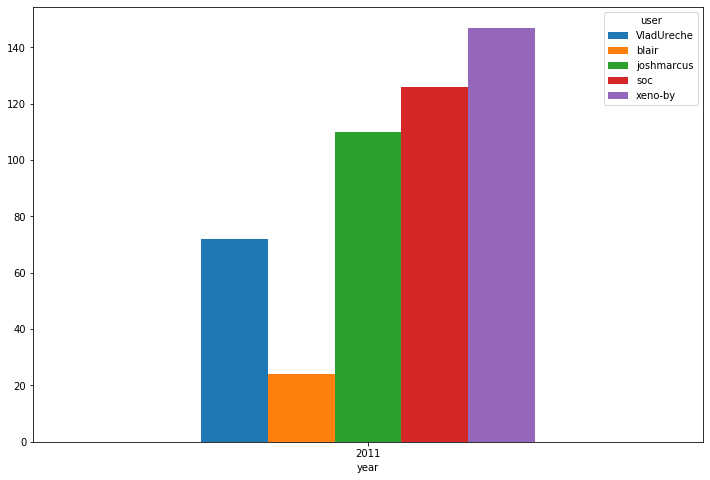

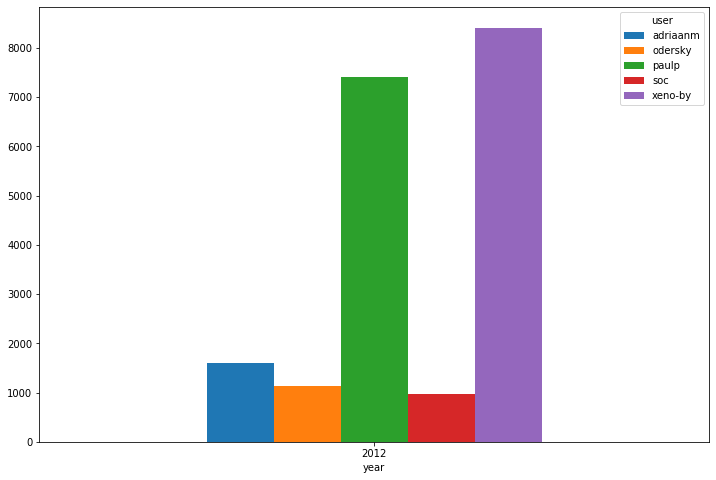

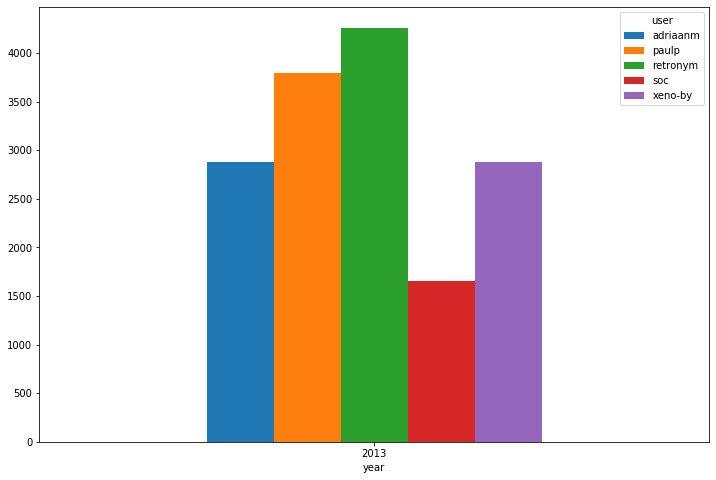

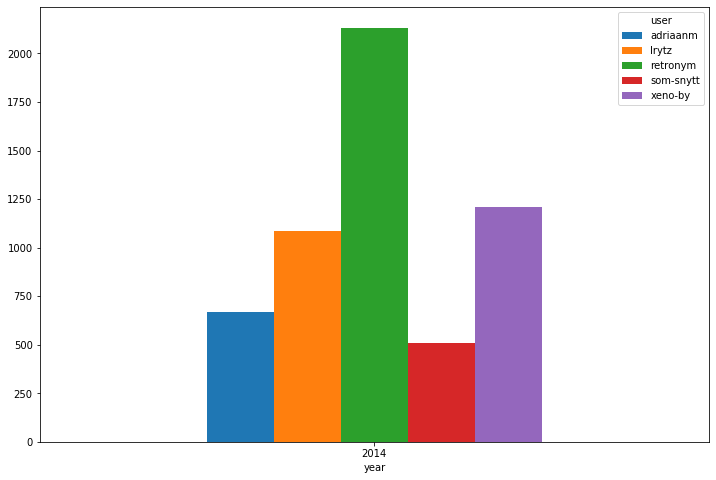

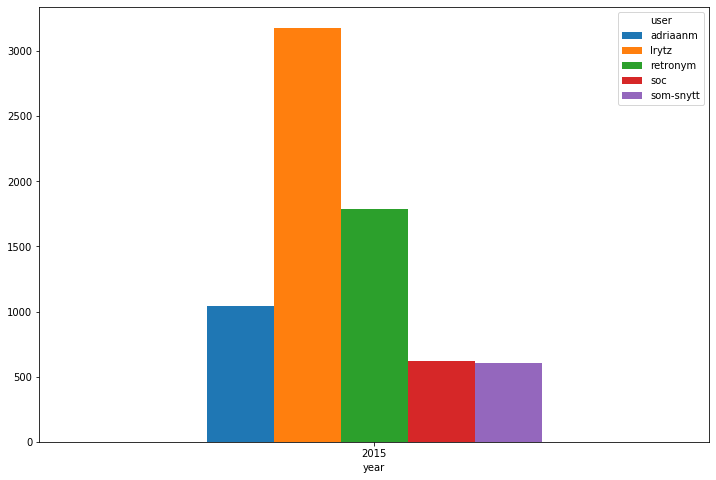

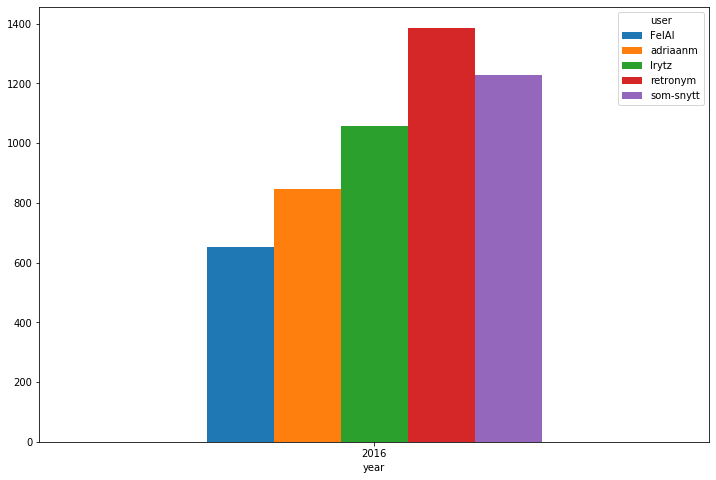

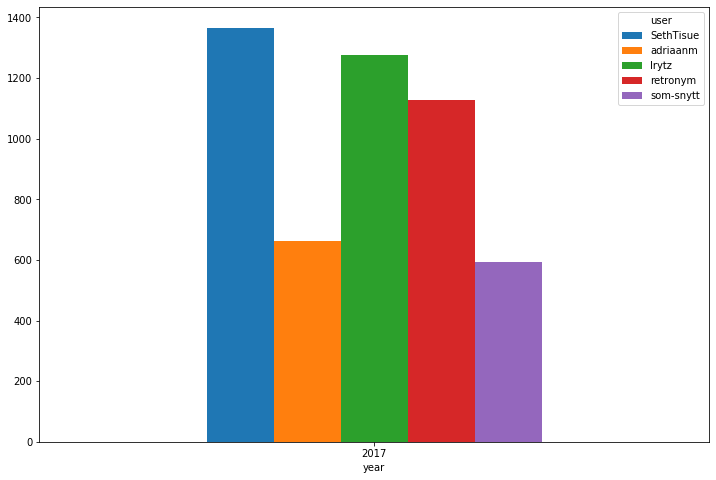

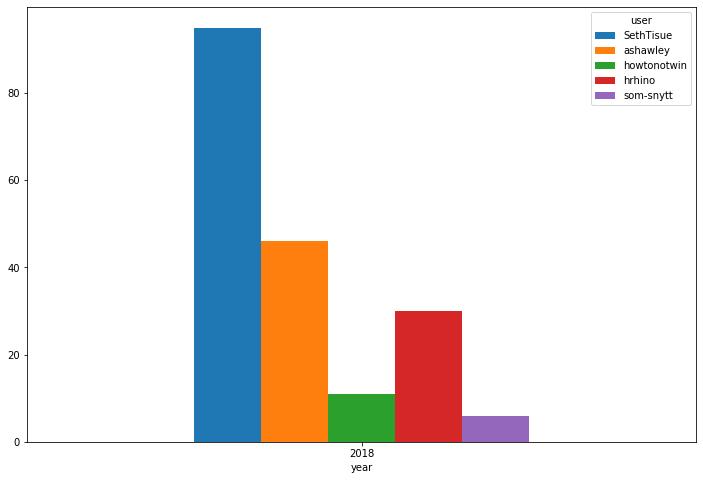

In [6]:
nilai = data.groupby(['year', 'user'], as_index=False)['file'].count().sort_values('file', ascending=False,ignore_index=True)

for i in range(2011,2019):
    tahun = nilai[nilai.year == i]
    tahun = tahun.nlargest(5, 'file')
    tahun = tahun.pivot_table(index='year', columns='user', values='file')

    tahun.plot.bar(rot=0, figsize=(12,8))
    plt.show()

# 7. File apa yang berubah dalam 10 pull request terakhir

In [7]:
# Identifikasi 10 pull request terakhir berdasarkan tanggal pull nya
last_10 = pulls.nlargest(10,'date')

# menggabungkan 2 dataset
joined_pr = last_10.merge(pull_files, on='pid')

# mengidentifikasi file
files = set(joined_pr.file.unique())

# tampilkan hasilnya
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

# 8. Siapa user yang melakukan pull request dari project berikut
project yang akan kita identifikasi adalah 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

In [8]:
# Nama file yang akan di identifikasi
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# mencari file yang sesuai dengan yang di identifikasi
file_pr = data[data.file == file]

# menghitung banyaknya user yang telah melakukan pull request pada file yang telah ditentukan
author_counts = file_pr.groupby('user', as_index=False)['file'].count()

author_counts.head(11)

,user,file
0,bjornregnell,1
1,densh,1
2,gkossakowski,1
3,melloc,1
4,odersky,2
5,paulp,2
6,retronym,5
7,soc,4
8,starblood,1
9,xeno-by,11


# 9. Siapa user yang melakukan 10 pull request terakhir pada project diatas 

In [9]:
# menggabungkan dataframe antara file yang sesuai dengan pull request berdasarkan pid dan usernya
joined_pr = file_pr.merge(pulls, on=['pid', 'user'])

# menemukan 10 pull request terakhir
users_last_10 = set(joined_pr.nlargest(10, 'date_x')['user'])

# Tampilkan hasilnya
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}